In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings as w
w.filterwarnings('ignore')
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


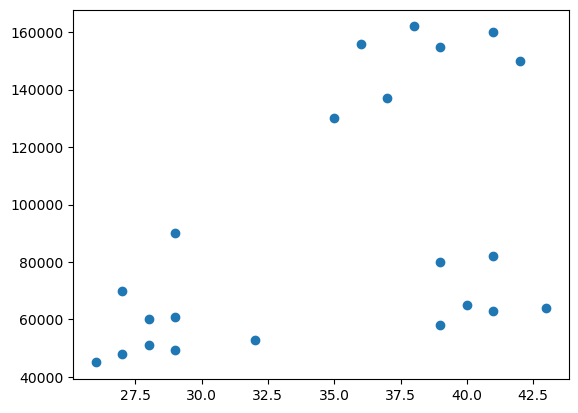

In [11]:
plt.scatter(df.Age, df['Income($)'])
plt.show()

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[["Age", "Income($)"]])
km.labels_

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [13]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


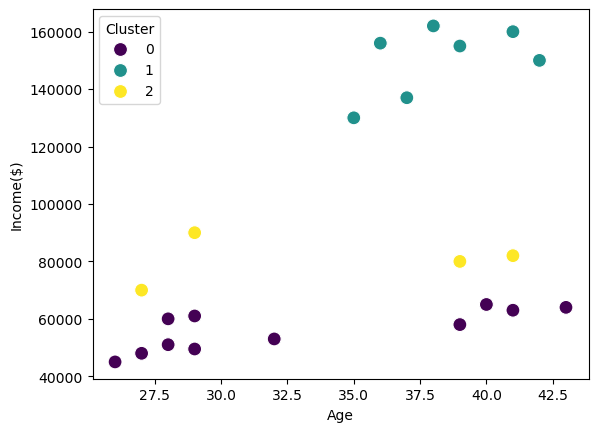

In [14]:
import seaborn as sns
sns.scatterplot(df, x = 'Age' , y = 'Income($)' , palette = 'viridis' , s = 100 , hue = 'Cluster')
plt.show()

Clusters are not formed properly. It can be due to Age and Income columns being on a different scale. We can try scaling them

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])
df_scaled

,Age,Income($)


In [16]:
df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [17]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[["Age", "Income($)"]])
df_scaled['Cluster'] = km.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [18]:
km.inertia_

0.4750783498553096

In [19]:
centroids = km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

<Axes: xlabel='Age', ylabel='Income($)'>

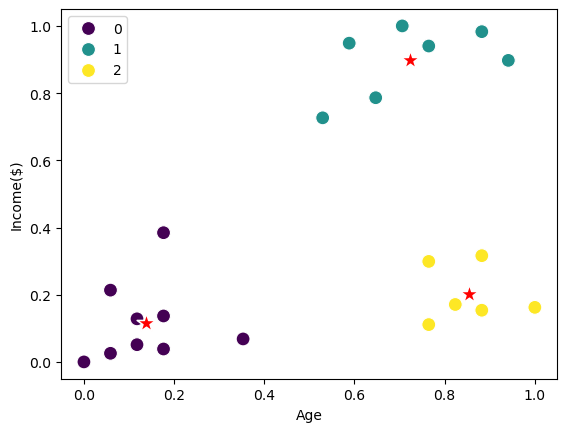

In [20]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],  s=200, color="red", marker='*')

## Elbow Method to determine optimal number of clusters

In [24]:
sse = []
k_rng = range(1,10)

for k in k_rng :
    km = KMeans(n_clusters = k , n_init = 'auto')
    km.fit(df_scaled[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.36877340764405897,
 0.27980629310461785,
 0.22754467591697364,
 0.1828178462775364,
 0.15822064614134235,
 0.11314812855825189]

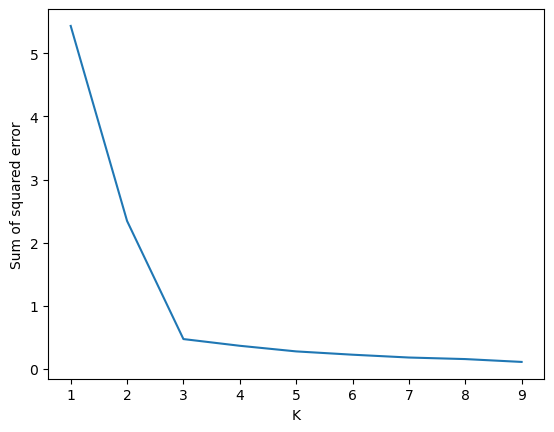

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

The chart shows optimal number of clusters are 3